<a href="https://colab.research.google.com/github/RutvikRJ6800/AVL-Cpp/blob/main/2022202015_A1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = list()
with open('/content/drive/MyDrive/Colab Notebooks/Assignment_1/Q3/train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('/content/drive/MyDrive/Colab Notebooks/Assignment_1/Q3/test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

In [40]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print((x_train.shape))
print((y_train.shape))

(240, 25)
(240,)


### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`
* In my implemetation of Linear Regression i made class with name LinearRegression, which has methods as fit(), predit(), score(), and get_mse()

* .fit() function takes train data, no. of epochs and learning rate as input and model try to fit best on it.

* In each pass of 1 epoch cost function will be calculated and parameters such as coefficients and intercept (b) will change s.t. cost function will minimise

* Parameter updation use Gradient decent algorithm with learning rate taken as input of .fit() function

* Cost function calculation and Parameter change will be performed for number of epoch taken as argument

* Final Parameters (Coefficents and intercept) will be used to predict the ouput on test observations

In [62]:
#@title 1.3.1.2 implement Linear Regression
# implement Linear Regression
class LinearRegression:

    def __init__(self):
        self.coef = np.zeros(25) # weights vecotor
        self.b = 0.0
        self.y_pred = None
        self.x_test = None
        self.y_test = None
        self.m = None # number of rows in train data
        self.n = None # number of cols in train data


    def calculate_cost(self):
        # MSE calculation
        return (1/(2*self.m))*(np.sum(np.square(self.y_pred - self.y_train)))


    def gradient_decent(self, alpha):
        y_sub = self.y_pred - self.y_train
        W = self.coef - (alpha)*((1/self.m)*(np.sum((self.x_train.T * y_sub).T, axis=0)))
        B = self.b - alpha * ((1 / self.m) * (np.sum(y_sub, dtype = np.float32)))
        return W, B
    

    # fit train data to model
    def fit(self, x_train, y_train, epochs = 2000, learning_rate = 0.01):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
        self.m, self.n = x_train.shape

        # interate loop for epochs:
        for i in range(epochs+1):
            # predict output & calculate cost
            self.y_pred = np.dot(self.x_train, self.coef) + self.b
            cost = self.calculate_cost() # J()

            # update coef and b values
            self.coef, self.b = self.gradient_decent(learning_rate)

            if i%1000 == 0:
                print("epoch:",i,",cost",cost)

        return self.coef, self.b
    

    def predict(self, x_test):
        x_test = np.array(x_test)
        y_pred = np.dot(x_test, self.coef) + self.b
        return y_pred
    

    # get r2 score (accuracy) of the model
    def score(self, x_test, y_test):
        my_prediction = np.dot(x_test, self.coef) + self.b
        y_test = np.array(y_test)
        
        # caculate r2_score
        u = np.sum((y_test - my_prediction)**2)
        v = np.sum((y_test - y_test.mean())**2)
        return 1 - (u/v) # return r2_score
    
    
    def get_mse(self, x_test, y_test):
        my_prediction = np.dot(x_test, self.coef) + self.b
        y_test = np.array(y_test)
        no_of_obs = len(y_train)
        return (1/no_of_obs) * (np.sum(np.square(my_prediction-y_test)))

In [41]:
LR = LinearRegression()
w, b = LR.fit(x_train, y_train) # train model with default epochs(2000) and learning rate 0.01
# print(w)
# print(b)

epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.10244680153854445
epoch: 2000 ,cost 0.02044310495258081


In [7]:
LR.score(x_test, y_test) # print score (r2_score) of trained model

0.9562556900739556

In [8]:
#@title 1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.
# 
# try with different learning rates and choose the best one
LR = LinearRegression()
w, b = LR.fit(x_train, y_train, epochs=2000, learning_rate=0.02)
print(LR.score(x_test, y_test))

epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.02042293665732925
epoch: 2000 ,cost 0.008083347560576557
0.7213812210011792


In [12]:
LR = LinearRegression()
w, b = LR.fit(x_train, y_train, epochs=10000, learning_rate=0.03)
print(LR.score(x_test, y_test))

epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.011202987477832735
epoch: 2000 ,cost 0.005164063871517622
epoch: 3000 ,cost 0.003281105835189147
epoch: 4000 ,cost 0.0022794288960885046
epoch: 5000 ,cost 0.0016367640051290382
epoch: 6000 ,cost 0.0012050746371411218
epoch: 7000 ,cost 0.0009119300927065912
epoch: 8000 ,cost 0.0007120447626073941
epoch: 9000 ,cost 0.0005752606797708344
epoch: 10000 ,cost 0.00048122365845650766
0.9952798880171229


In [13]:
LR = LinearRegression()
w, b = LR.fit(x_train, y_train, epochs=10000, learning_rate=0.04)
print(LR.score(x_test, y_test))

epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.008080936642416709
epoch: 2000 ,cost 0.0037566943765775934
epoch: 3000 ,cost 0.002279315937175552
epoch: 4000 ,cost 0.001473712995756927
epoch: 5000 ,cost 0.0009973683995247692
epoch: 6000 ,cost 0.0007120032245266451
epoch: 7000 ,cost 0.0005399280137365338
epoch: 8000 ,cost 0.00043525751129286453
epoch: 9000 ,cost 0.0003707255622877048
epoch: 10000 ,cost 0.00033011760885265395
0.9852445485649873


In [14]:
w, b = LR.fit(x_train, y_train, epochs=10000, learning_rate=0.04)
print(LR.score(x_test, y_test))

epoch: 0 ,cost 0.00033008536277531254
epoch: 1000 ,cost 0.0003037683091605092
epoch: 2000 ,cost 0.0002859900576661945
epoch: 3000 ,cost 0.0002733391114416232
epoch: 4000 ,cost 0.0002637850657309874
epoch: 5000 ,cost 0.00025611889272288493
epoch: 6000 ,cost 0.000249620098459329
epoch: 7000 ,cost 0.0002438587895746989
epoch: 8000 ,cost 0.00023857796441315937
epoch: 9000 ,cost 0.00023362351022516208
epoch: 10000 ,cost 0.00022890256928878277
0.9743134012628634


epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.10244680153854445
epoch: 2000 ,cost 0.02044310495258081
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.02042293665732925
epoch: 2000 ,cost 0.008083347560576557
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.011202987477832735
epoch: 2000 ,cost 0.005164063871517622
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.008080936642416709
epoch: 2000 ,cost 0.0037566943765775934
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.006310410184367802
epoch: 2000 ,cost 0.0028902018291890874
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.005162565440480326
epoch: 2000 ,cost 0.002279090042121413
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.00435810097474913
epoch: 2000 ,cost 0.00182233064963658
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.0037557025441675163
epoch: 2000 ,cost 0.0014733948038288605
epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.0032799744817716987
epoch: 2000 ,cost 0.0012046650519060055


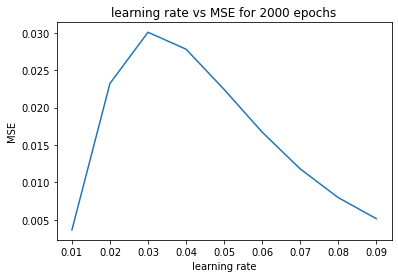

In [43]:
#@title Plot graph of different learning rate vs MSE (for 2000 epochs)
from matplotlib import pyplot as plt

x = np.arange (0.01, 0.10, 0.01)
y = []

for i in x:
    LR = LinearRegression()
    w, b = LR.fit(x_train, y_train, epochs=2000, learning_rate=i)
    y.append(LR.get_mse(x_test, y_test))

plt.plot(x, y)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title('learning rate vs MSE for 2000 epochs')
plt.show()

epoch: 0 ,cost 3.076785754731054
epoch: 1000 ,cost 0.011202987477832735
epoch: 2000 ,cost 0.005164063871517622
epoch: 3000 ,cost 0.003281105835189147
epoch: 4000 ,cost 0.0022794288960885046
epoch: 5000 ,cost 0.0016367640051290382
epoch: 6000 ,cost 0.0012050746371411218
epoch: 7000 ,cost 0.0009119300927065912
epoch: 8000 ,cost 0.0007120447626073941
epoch: 9000 ,cost 0.0005752606797708344
epoch: 10000 ,cost 0.00048122365845650766


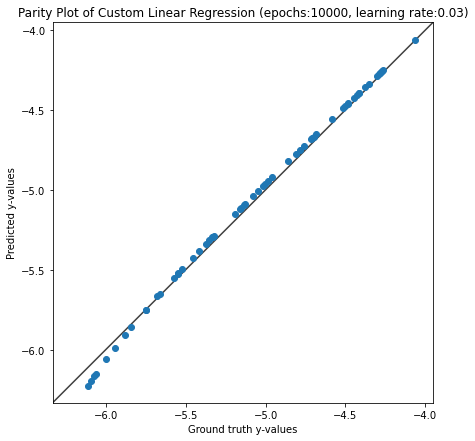

In [69]:
#@title  1.3.1.4 Parity Plot of model's bandgap predictions on the test set with the actual values
LR = LinearRegression()
w, b = LR.fit(x_train, y_train, epochs=10000, learning_rate=0.03)

# Get the predictions of x_test into `y_pred`
y_pred = LR.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression (epochs:10000, learning rate:0.03)')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

* Ridge regression is the type of regression where the L2 norm is used as regularization while minimizing the cost function.

* Other flow of computation is same as normal regularization

In [50]:
#@title 1.3.2.2 implement Ridge regression & explore the effect of different values of `alpha`
 
import sklearn
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)
print("r2 score of ridge regression model (alpha = 1)",ridge.score(x_test, y_test))

import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error

alpha_values = np.around(np.arange (0.1, 2.1, 0.1, dtype='float'), decimals=1)
y = []
for i in alpha_values:
    ridge = Ridge(alpha = i)
    ridge.fit(x_train, y_train)
    y.append(np.sqrt(mean_squared_error(y_test, ridge.predict(x_test))))


fig = go.Figure(data=[go.Table(header=dict(values=['alpha', 'RMSE']), cells=dict(values=[alpha_values, y]))])
fig.show()

r2 score of ridge regression model (alpha = 1) 0.9849409985959743


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
* Since ridge regression uses L2 norms into the consideration while minimizing the cost, eventually it stop overfitting the parameters for train data.

* Cost function of ridge regression is: Min(||Y – X(theta)||^2 + λ||theta||^2)

* Here ||theta||^2 forces parameters(theta) to be small as posible, also λ scale the square term.

* Hence model will learn parameters by taking it's value small, to stop the overfit.

* Evantually model trained using redge will have low variance.

* So, Model will predict correctly even for unseen data

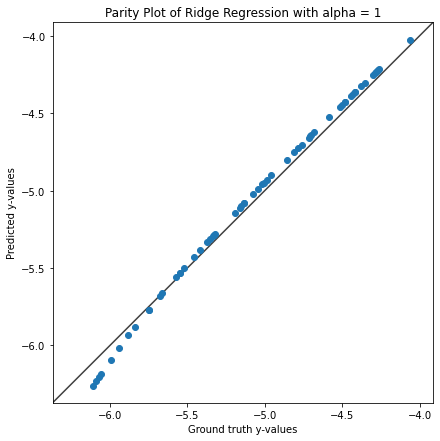

In [54]:
#@title 1.3.2.4 Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.
ridge = Ridge(alpha = 0.4)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Ridge Regression with alpha = 1')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`
* Lasso regression is the type of regression where the L1 norm is used as regularization while minimizing the cost function.

* Other flow of computation is same as normal regularization

* Lasso regression uses absolute coefficient values for normalization.

In [68]:
#@title 1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.
import sklearn

# Implement Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
print("r2_score of lasso regression with alpha = 1:",lasso.score(x_test, y_test))

# Make a table where you explore the effect of different values of `alpha`
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error

alpha_values = np.around(np.arange (0.01, 0.2, 0.01, dtype='float'), decimals=2)
y = []
for i in alpha_values:
    lasso = Lasso(alpha = i)
    lasso.fit(x_train, y_train)
    y.append(np.sqrt(mean_squared_error(y_test, lasso.predict(x_test))))


fig = go.Figure(data=[go.Table(header=dict(values=['alpha', 'RMSE']), cells=dict(values=[alpha_values, y]))])
fig.show()

r2_score of lasso regression with alpha = 1: -53.66334253166347


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

* In lasso regression, during the calculation of cost function only considers absolute coefficients (weights), the optimization algorithm will penalize high coefficients. This is known as the L1 norm.

* Cost function of lasso regression is: Min(||Y – X(theta)||^2 + λ||theta||)

* Here ||theta|| forces parameters(theta) to be zero or small as posible, also λ scale the term.

* It can shrink some coefficients to zero, so that it can effectively perform feature selection.

* Model will learn parameters by taking it's value small, to stop the overfit.

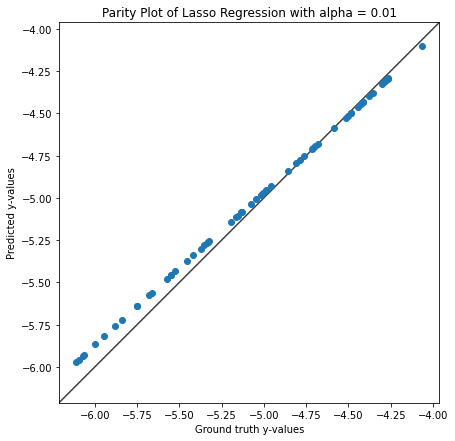

In [66]:
#@title 1.3.3.4 Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.
lasso = Lasso(alpha = 0.015)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Lasso Regression with alpha = 0.01')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()